In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the dataset

In [2]:
dataset=pd.read_csv(r'C:\Users\rohin\OneDrive\Desktop\Datasets\Medical Cost.csv')

In [3]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.shape

(1338, 7)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1330 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1335 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1330.000000,1338.000000,1338.000000
mean,39.207025,30.664289,1.094918,13270.422265
std,14.049960,6.093764,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.656250,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
#checking for null values
dataset.isnull().any()

age         False
sex         False
bmi          True
children    False
smoker       True
region      False
charges     False
dtype: bool

In [8]:
#checking for how many missing values
dataset.isnull().sum()

age         0
sex         0
bmi         8
children    0
smoker      3
region      0
charges     0
dtype: int64

# DATA PREPROCESSING

# Handling the Missing values

In [9]:
dataset.mean()

age            39.207025
bmi            30.664289
children        1.094918
charges     13270.422265
dtype: float64

In [10]:
#filling the missing values with mean
dataset.fillna(dataset.mean(),inplace=True)

In [11]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker       True
region      False
charges     False
dtype: bool

In [12]:
dataset["smoker"].value_counts()

no     1062
yes     273
Name: smoker, dtype: int64

In [13]:
#dropping the null values
dataset.dropna(inplace=True)

In [14]:
dataset.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [15]:
dataset.shape

(1335, 7)

In [16]:
dataset["charges"]

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1335, dtype: float64

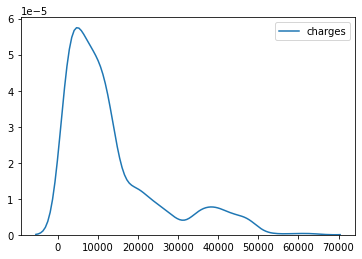

In [17]:
sns.kdeplot(dataset["charges"])

# Sampling

In [18]:
import random

In [19]:
n=10
k=5

In [20]:
samples=[]

In [21]:
for i in range(n):
    print(i)
    samples.append(random.choices(dataset["charges"],k=k))

0
1
2
3
4
5
6
7
8
9


In [22]:
samples

[[9724.53, 12430.95335, 3556.9223, 7151.092, 12629.8967],
 [9391.346, 38746.3551, 11554.2236, 15161.5344, 12124.9924],
 [8413.46305, 1633.0444, 36021.0112, 2480.9791, 12629.1656],
 [12815.44495, 2219.4451, 6406.4107, 9182.17, 23244.7902],
 [37607.5277, 15019.76005, 19040.876, 1731.6770000000001, 6356.2707],
 [8964.06055, 7639.41745, 4846.92015, 1743.214, 12979.358],
 [44585.45587, 7147.4728, 7623.518, 10923.9332, 12347.171999999999],
 [13352.0998, 2897.3235, 7256.7231, 30259.995560000003, 10848.1343],
 [11931.12525, 1615.7667, 1121.8739, 4618.0799, 24873.3849],
 [27218.43725, 3471.4096, 6500.2359, 19749.383380000003, 19350.3689]]

In [23]:
random.choices(dataset["charges"],k=k)

[5397.6167, 3268.84665, 2527.81865, 48673.5588, 12224.35085]

# Finding mean of sample means

In [24]:
np.mean(samples[0])

9098.67887

In [25]:
sample_mean=[]

In [26]:
for s in samples:
    sample_mean.append(np.mean(s))

In [27]:
sample_mean

[9098.67887,
 17395.6903,
 12235.532669999999,
 10773.652189999999,
 15951.22229,
 7234.59403,
 16525.510373999998,
 12922.855252000001,
 8832.046129999999,
 15257.967006]

# Distribution of sample means

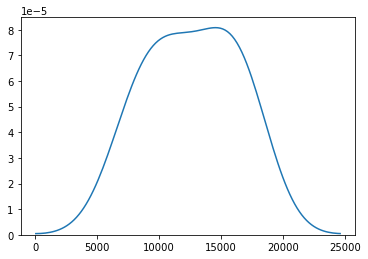

In [28]:
sns.kdeplot(sample_mean)

# Mean of sample mean

In [29]:
s_mean=np.mean(sample_mean)

In [30]:
s_mean

12622.7749112

In [31]:
dataset["charges"].mean()

13256.609590381275

# Variance

In [32]:
s_var=np.var(sample_mean)

In [33]:
s_var

11551549.514228867

In [34]:
dataset["charges"].var()/k

29190365.035901446

# STD

In [35]:
s_std=np.std(sample_mean)

In [36]:
s_std

3398.757054311012

In [37]:
dataset["charges"].std()/np.sqrt(k)

5402.8108458376955

# Confidence Interval

# for 90% confidence level

In [38]:
z=1.645

In [39]:
s_mean

12622.7749112

In [40]:
s_std

3398.757054311012

In [41]:
lower_limit_ci=s_mean-(z*s_std)

In [42]:
lower_limit_ci

7031.819556858385

In [43]:
upper_limit_ui=s_mean+(z*s_std)

In [44]:
upper_limit_ui

18213.730265541613

In [45]:
lower_limit_ci,upper_limit_ui

(7031.819556858385, 18213.730265541613)

We can conclude that the mean of the data is in the range of 7031 to 18213 for 90% confidence interval

# 95% confidence interval

In [46]:
z=1.96

In [47]:
lower_limit_ci1=s_mean-z*s_std

In [48]:
upper_limit_ui1=s_mean+z*s_std

In [49]:
lower_limit_ci1,upper_limit_ui1

(5961.211084750417, 19284.33873764958)

We can conclude that the mean of the data is in the range of 5961 to 19284 for 95% confidence interval